In [19]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [10]:
data.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


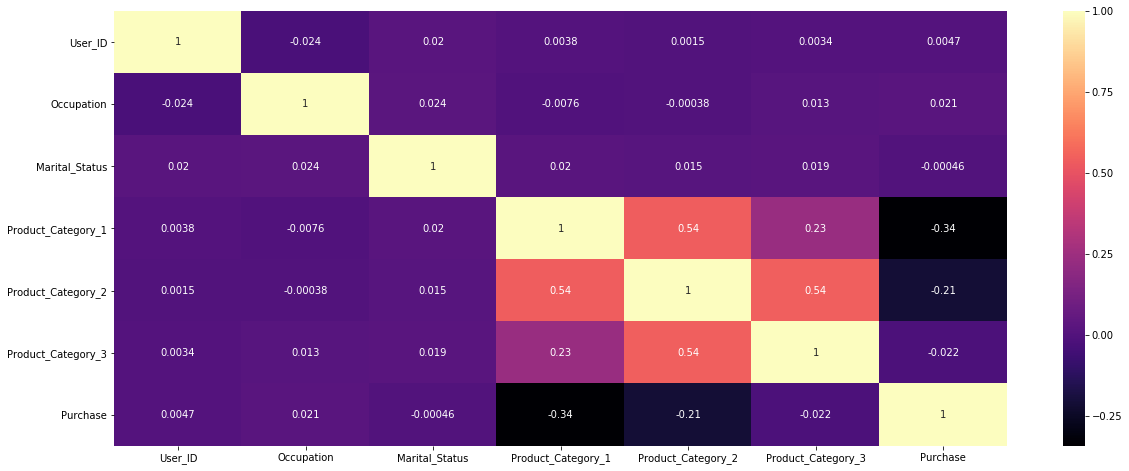

In [11]:
#visualizing the corelation between the variables in our dataset
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),cmap='magma',annot=True)

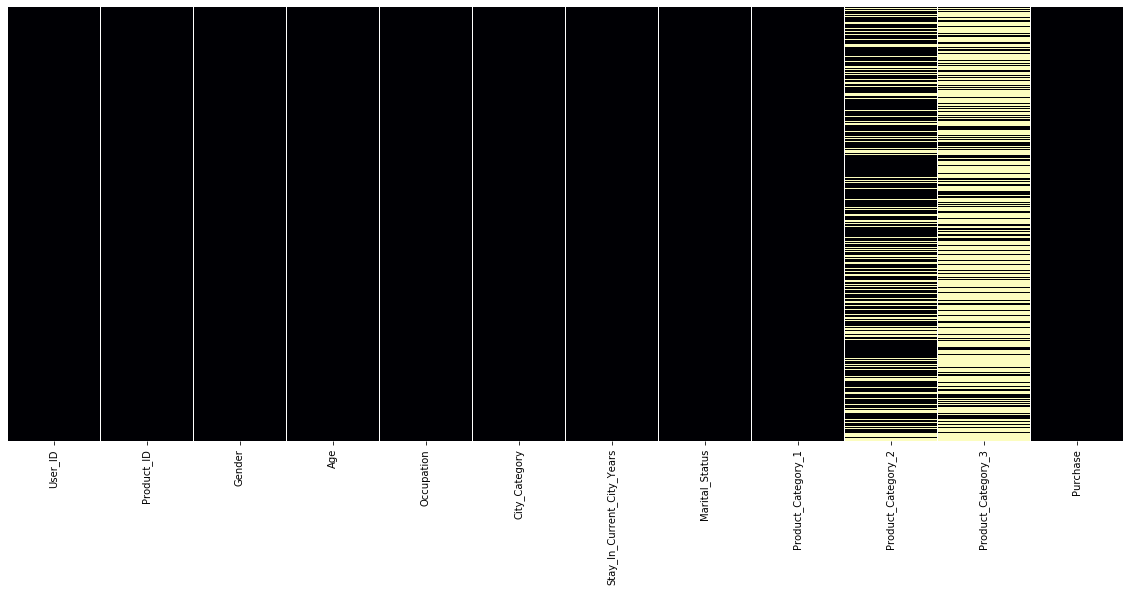

In [6]:
#Checking the null values on the dataset
plt.figure(figsize=(20,8))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='magma')

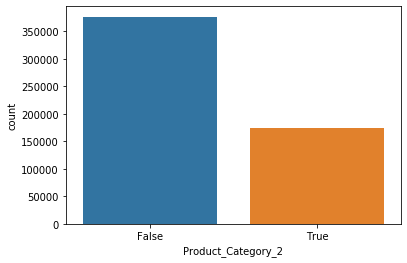

In [13]:
sns.countplot(data['Product_Category_2'].isnull())

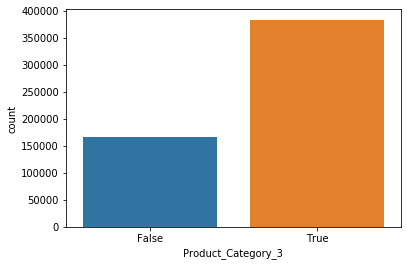

In [14]:
sns.countplot(data['Product_Category_3'].isnull())

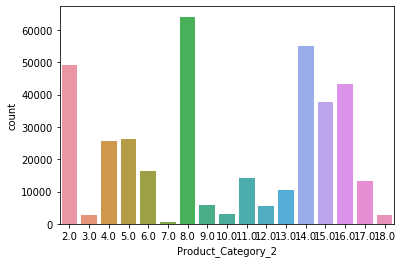

In [15]:
sns.countplot(data['Product_Category_2'])

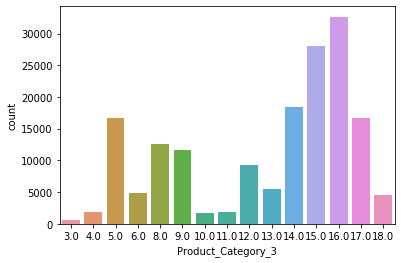

In [16]:
sns.countplot(data['Product_Category_3'])

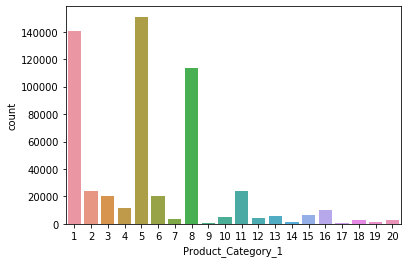

In [17]:
sns.countplot(data['Product_Category_1'])

In [23]:
#calculating mode of product 2 and 3
scipy.stats.mode(data['Product_Category_2'])

ModeResult(mode=array([8.]), count=array([64088]))

In [24]:
scipy.stats.mode(data['Product_Category_3'])

ModeResult(mode=array([16.]), count=array([32636]))

In [25]:
#handling the null values of product 2 and 3
data['Product_Category_2']=data['Product_Category_2'].fillna(8.0)

In [26]:
data['Product_Category_3']=data['Product_Category_3'].fillna(16.0)

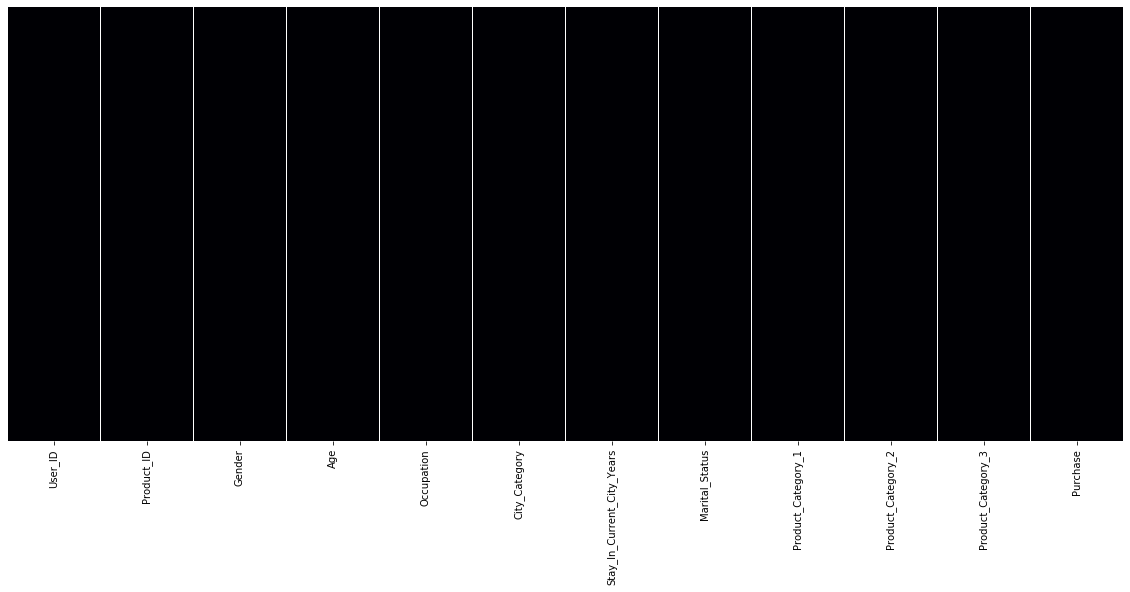

In [27]:
#Checking the null values on the dataset
plt.figure(figsize=(20,8))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='magma')

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
lbc=LabelEncoder()

In [34]:
#getting dummies for gender and city category columns

dummies_gender=pd.get_dummies(data['Gender'])
labels_citycategory=lbc.fit(data['City_Category'])
labels_citycategory=labels_citycategory.transform(data['City_Category'])
labels_citycategory=pd.DataFrame(labels_citycategory)
dummies_gender=pd.DataFrame(dummies_gender)



In [35]:
#Label encoding the age column
labels_age=lbc.fit(data['Age'])
labels_age=labels_age.transform(data['Age'])
labels_age=pd.DataFrame(labels_age)


In [30]:
data[data['Stay_In_Current_City_Years']=='4+']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969
19,1000008,P00249542,M,26-35,12,C,4+,1,1,5.0,15.0,19614
20,1000008,P00220442,M,26-35,12,C,4+,1,5,14.0,16.0,8584
21,1000008,P00156442,M,26-35,12,C,4+,1,8,8.0,16.0,9872
22,1000008,P00213742,M,26-35,12,C,4+,1,8,8.0,16.0,9743
23,1000008,P00214442,M,26-35,12,C,4+,1,8,8.0,16.0,5982
24,1000008,P00303442,M,26-35,12,C,4+,1,1,8.0,14.0,11927
29,1000010,P00085942,F,36-45,1,B,4+,1,2,4.0,8.0,16352
30,1000010,P00118742,F,36-45,1,B,4+,1,5,11.0,16.0,8886
31,1000010,P00297942,F,36-45,1,B,4+,1,8,8.0,16.0,5875


In [31]:
def remove4(x):
    if(x=='4+'):
        return 5
    else:
        return x

In [32]:
#replacing 4+ with 5 and converting the entire column to integer
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].apply(remove4)
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(str).astype(int)


In [36]:
#Creating the entire data frame with all the dummy and encoded variables
data['Age_labels']=labels_age
data['city_labels']=labels_citycategory
data=pd.concat([data,dummies_gender],axis=1)

In [38]:
data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_labels,city_labels,F,M
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370,0,0,1,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,0,0,1,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422,0,0,1,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057,0,0,1,0
4,1000002,P00285442,M,55+,16,C,5,0,8,8.0,16.0,7969,6,2,0,1
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,16.0,15227,2,0,0,1
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,4,1,0,1
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,16.0,15854,4,1,0,1
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,16.0,15686,4,1,0,1
9,1000005,P00274942,M,26-35,20,A,1,1,8,8.0,16.0,7871,2,0,0,1


In [39]:
#importing all our models to predict sales
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
lr=LinearRegression()
rd=RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,max_features = "auto", min_samples_leaf = 10)
dt=DecisionTreeRegressor()


In [41]:
#Defining the dependent and independet=nt variables
X=data[[
                        
                       'Occupation',              
       'Stay_In_Current_City_Years',             'Marital_Status',
               'Product_Category_1',         'Product_Category_2',
               'Product_Category_3',                   
                                'F',                          'M',                          
                       'Age_labels',                'city_labels']]
y=data['Purchase']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [44]:
#training our models
lr.fit(X_train,y_train)
rd.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [45]:
#predicting the results
lrp=lr.predict(X_test)
rdp=rd.predict(X_test)
dtp=dt.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error

In [47]:
print('Linear regression::',np.sqrt(mean_squared_error(y_test,lrp)))

Linear regression:: 4673.977469281665


In [51]:
print('Random forest regressor::',np.sqrt(mean_squared_error(y_test,rdp)))

Random forest regressor:: 2899.4164792959837


In [52]:
print('Decision tree regressor::',np.sqrt(mean_squared_error(y_test,dtp)))

Decision tree regressor:: 3334.7937945909493
